In [1]:
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn import datasets, linear_model  

In [2]:
data = pd.read_csv('data_state.csv',sep=',') 
data['intercept'] = 1.0
data.head()

,State,Legal Aid Attorneys per capita,unsheltered homelessness ratio,ratio,rental price average,Gini coefficients,w/o health insurance%,POP_ST,POPPCT_URBAN,intercept
0,Alabama,0.000025,0.000251,10.071921,0.655461,0.485,9.1,4779736,59.04,1.0
1,Alaska,0.000113,0.000600,5.286890,1.212974,0.408,14.0,710231,66.02,1.0
2,Arizona,0.000042,0.000482,11.413810,0.816850,0.471,10.0,6392017,89.81,1.0
3,Arkansas,0.000033,0.000286,8.578452,0.713312,0.472,7.9,2915918,56.16,1.0
4,California,0.000044,0.002020,45.891819,1.640888,0.490,7.3,37253956,94.95,1.0


In [3]:
data.describe()

,Legal Aid Attorneys per capita,unsheltered homelessness ratio,ratio,rental price average,Gini coefficients,w/o health insurance%,POP_ST,POPPCT_URBAN,intercept
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,5.100000e+01,51.000000,51.0
mean,0.000079,0.000415,7.678371,1.071710,0.468294,7.90000,6.053834e+06,74.099804,1.0
std,0.000129,0.000572,8.774832,0.439878,0.027864,3.04447,6.823984e+06,14.885178,0.0
min,0.000024,0.000035,0.478821,0.655461,0.408000,2.50000,5.636260e+05,38.660000,1.0
25%,0.000037,0.000106,1.867531,0.802998,0.452000,5.60000,1.696962e+06,65.390000,1.0
50%,0.000047,0.000232,4.284071,0.930944,0.468000,8.00000,4.339367e+06,74.200000,1.0
75%,0.000073,0.000470,11.030929,1.180264,0.479500,9.60000,6.636084e+06,87.535000,1.0
max,0.000933,0.003035,45.891819,2.866655,0.590000,16.60000,3.725396e+07,100.000000,1.0


In [4]:
#independent_factors = ['rental price average','Gini coefficients','w/o health insurance%','POP_ST','POPPCT_URBAN','intercept']
independent_factors = ['rental price average','Gini coefficients','w/o health insurance%','POP_ST','POPPCT_URBAN']
independent_factors_l = ['Legal Aid Attorneys per capita','rental price average','Gini coefficients','w/o health insurance%','POP_ST','POPPCT_URBAN']
independent_factors_h = ['unsheltered homelessness ratio','rental price average','Gini coefficients','w/o health insurance%','POP_ST','POPPCT_URBAN']
X = data[independent_factors]
X_l = data[independent_factors_l]
X_h = data[independent_factors_h]

In [22]:
y_legal = data['Legal Aid Attorneys per capita']
y_homeless = data['unsheltered homelessness ratio']
y_ratio = data['ratio']

a = ['Legal Aid Attorneys per capita','intercept']
b = ['unsheltered homelessness ratio','intercept']
y_legal_intercept = data[a]
y_homeless_intercept = data[b]

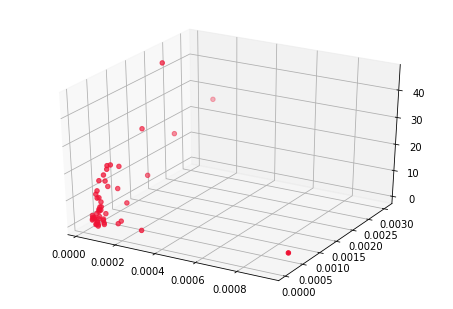

In [74]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(y_legal, y_homeless, y_ratio, color='#ef1234')
plt.show()

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test= train_test_split(X, test_size=0.2, random_state=0)
X_train_l, X_test_l= train_test_split(X_l, test_size=0.2, random_state=0)
X_train_h, X_test_h= train_test_split(X_h, test_size=0.2, random_state=0)
y_train_homeless, y_test_homeless = train_test_split(y_homeless, test_size=0.2, random_state=0)
y_train_legal, y_test_legal = train_test_split(y_legal, test_size=0.2, random_state=0)
y_train_ratio, y_test_ratio = train_test_split(y_ratio, test_size=0.2, random_state=0)
y_train_legal_intercept,y_test_legal_intercept = train_test_split(y_legal_intercept, test_size=0.2, random_state=0)
y_train_homeless_intercept,y_test_homeless_intercept = train_test_split(y_homeless_intercept, test_size=0.2, random_state=0)

In [15]:
print(len(y_train_homeless))
print(len(y_test_homeless))
print(len(y_train_legal))
print(len(y_test_legal))
print(len(y_train_ratio))
print(len(y_test_ratio))
print(len(X_train))
print(len(X_test))
print(len(X_train_l))
print(len(X_test_l))
print(len(X_train_h))
print(len(X_test_h))

40
11
40
11
40
11
40
11
40
11
40
11


In [62]:
L = data['Legal Aid Attorneys per capita'].values * 10000
H = data['unsheltered homelessness ratio'].values *10000

In [75]:
mean_l = np.mean(L)
mean_h = np.mean(H)

# Total number of values
m = len(L)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (L[i] - mean_l) * (H[i] - mean_h)
    denom += (L[i] - mean_l) ** 2
b1 = numer / denom
b0 = mean_h - (b1 * mean_l)

# Print coefficients
print(b1, b0)

0.278396025967 3.93009201546


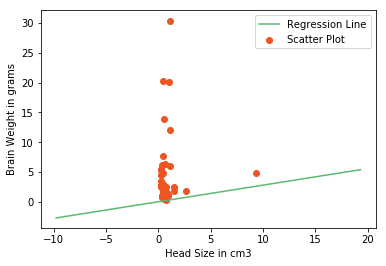

In [68]:
max_l = np.max(L)+10
min_l = np.min(L)-10

# Calculating line values x and y
l = np.linspace(min_l, max_l, 1000)
h = b0 + b1 * l

# Ploting Line
plt.plot(l, h, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(L, H, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [76]:
model = linear_model.LinearRegression()
result_2 = model.fit(y_train_legal_intercept, y_train_homeless)

In [87]:
from sklearn.metrics import mean_squared_error
y_predict_homeless = result_2.predict(y_test_legal_intercept)
MSE_1 = mean_squared_error(y_predict_homeless, y_test_homeless)
print (MSE_1)

1.07837996493e-06


In [86]:
#OLS for legal, X includes homeless
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
model_legal = sm.OLS(y_train_legal, X_train_h)
results_legal = model_legal.fit()
print(results_legal.summary())

y_pred_legal = results_legal.predict(X_test_h)
MSE_test_legal = mean_squared_error(y_test_legal, y_pred_legal)
print ('The MSE of OLS on the legal aid ratio test is %f.'%(MSE_test_legal))

                                  OLS Regression Results                                  
Dep. Variable:     Legal Aid Attorneys per capita   R-squared:                       0.693
Model:                                        OLS   Adj. R-squared:                  0.639
Method:                             Least Squares   F-statistic:                     12.78
Date:                            Tue, 10 Apr 2018   Prob (F-statistic):           1.66e-07
Time:                                    12:21:05   Log-Likelihood:                 316.12
No. Observations:                              40   AIC:                            -620.2
Df Residuals:                                  34   BIC:                            -610.1
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025    

In [135]:
#OLS for homeless, X includes legal aid
model_homeless = sm.OLS(y_train_homeless, X_train_l)
results_homeless = model_homeless.fit()
print(results_homeless.summary())

y_pred_homeless = results_homeless.predict(X_test_l)
MSE_test_homeless = mean_squared_error(y_test_homeless, y_pred_homeless)
print ('The MSE of OLS on the homeless ratio test is %f.'%(MSE_test_homeless))

                                  OLS Regression Results                                  
Dep. Variable:     unsheltered homelessness ratio   R-squared:                       0.459
Model:                                        OLS   Adj. R-squared:                  0.363
Method:                             Least Squares   F-statistic:                     4.805
Date:                            Mon, 09 Apr 2018   Prob (F-statistic):            0.00120
Time:                                    16:10:41   Log-Likelihood:                 261.98
No. Observations:                              40   AIC:                            -512.0
Df Residuals:                                  34   BIC:                            -501.8
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025    

In [83]:
model_ratio = sm.OLS(y_train_ratio, X_train)
results_ratio = model_ratio.fit()
print(results_ratio.summary())

y_pred_ratio = results_ratio.predict(X_test)
MSE_test_ratio = mean_squared_error(y_test_ratio, y_pred_ratio)
print ('The MSE of OLS on the homeless ratio test is %f.'%(MSE_test_ratio))

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     11.62
Date:                Tue, 10 Apr 2018   Prob (F-statistic):           1.16e-06
Time:                        12:19:30   Log-Likelihood:                -120.29
No. Observations:                  40   AIC:                             250.6
Df Residuals:                      35   BIC:                             259.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
rental price average     -1.77